# AWS Bedrock Flow Examples

This section introduces various examples of how to utilize AWS Bedrock flows, showcasing different functionalities and use cases.

#### Agent Runtime Client

In this part, we establish a connection to the AWS Bedrock agent runtime client, which allows us to invoke flows and interact with the AWS Bedrock service.


In [2]:
import boto3

client_runtime = boto3.client('bedrock-agent-runtime')

#### General Purpose functions

This section defines general-purpose functions that can be reused throughout the notebook. These functions facilitate the invocation of flows and handle the responses received from the AWS Bedrock service.

In [3]:
import boto3

def invoke_flow(client_runtime, flow_id, flow_alias_id, params):
    inputs = [{
        "content": {
            "document": params
        },
        "nodeName": "FlowInputNode", # Name of the input node.
        "nodeOutputName": "document"
    }]
    
    response = client_runtime.invoke_flow(
        flowIdentifier=flow_id,
        flowAliasIdentifier=flow_alias_id,
        inputs=inputs
    )
    
    result = {}
    
    for event in response.get("responseStream"):
        result.update(event)
    
    if result['flowCompletionEvent']['completionReason'] == 'SUCCESS':
        print("Flow invocation was successful! The output of the flow is as follows:\n")
        print(result['flowOutputEvent']['content']['document'])
    
    else:
        print("The flow invocation completed because of the following reason:", result['flowCompletionEvent']['completionReason'])

    return result

---
## 1. Prompt Flow

This section covers the concept of prompt flows, demonstrating how to create and use flows that respond to user prompts or queries.

#### 1.1 Direct prompting

Here, we explore the use of direct prompting in flows, providing examples of how to query information directly and receive responses.


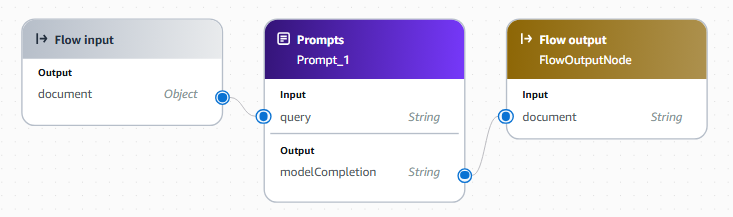

In [4]:
flow_id = 'EI1ILMS9R0'
flow_alias_id = 'IZUD3L1ZA6'

params = {
    "query": "What is the capital of India?",
}

result = invoke_flow(
    client_runtime,
    flow_id,
    flow_alias_id,
    params
)

Flow invocation was successful! The output of the flow is as follows:

The capital city of India is New Delhi.


#### 1.2 Format prompt with json parameters

This section illustrates how to format prompts using JSON parameters, enabling more structured and complex queries to the flow.


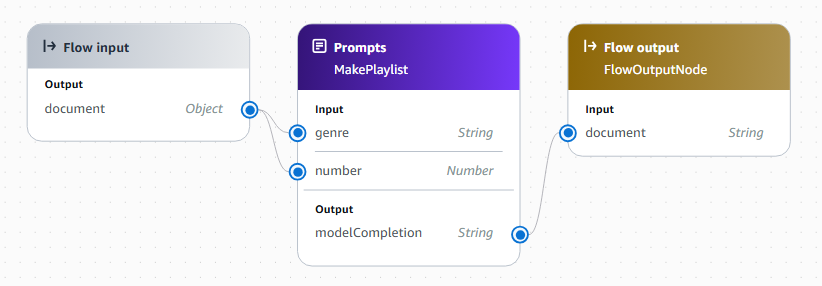

In [5]:
flow_id = 'SO8YEJ4QTZ'
flow_alias_id = 'BSPD27CVS2'

params = {
    "genre": "pop",
    "number": 3
}

result = invoke_flow(
    client_runtime,
    flow_id,
    flow_alias_id,
    params
)

Flow invocation was successful! The output of the flow is as follows:

Here is a pop playlist with 3 songs:

1. "Shape of You" by Ed Sheeran
2. "Despacito" by Luis Fonsi and Daddy Yankee
3. "Havana" by Camila Cabello


---
## 2. Agent Flow

In this section, we delve into agent flows, which allow for more advanced interactions and processing of data within the AWS Bedrock environment.

Obs: The agent can have either unstructured or structured data store knowledge base.

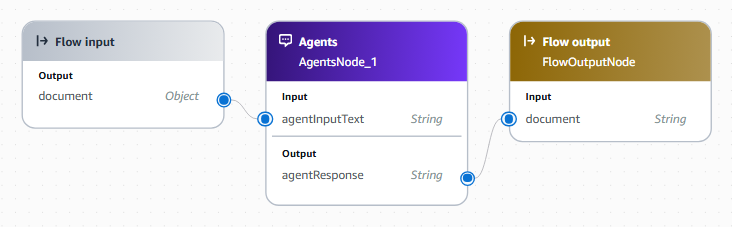

In [6]:
flow_id = '0JCJBJ50LB'
flow_alias_id = '1127YLF8O5'

query = """
Provide an extensive critical report on the system's database logic.
- First, search the file with the tables' schemas.
- Then, search the file with the tables relationships.
- Then, write your analysis on how the database is structured and points where the database modeling could improve.
"""

params  = {'query': query}

result = invoke_flow(
    client_runtime,
    flow_id,
    flow_alias_id,
    params
)

Flow invocation was successful! The output of the flow is as follows:

Based on the search results provided, the database schema appears to consist of several tables related to a reporting system. The key tables and their relationships are as follows:

The `report` table stores information about generated reports, including the project ID, file ID, status, and timestamps for creation and modification. This table has foreign key relationships with the `user` table for tracking the users who created and modified the reports.

The `report_queue` table tracks the status of report generation tasks, with foreign key relationships to the `report`, `project`, and `user` tables.

The `report_section_config` table defines the configuration for different sections within a report, including the report type, company ID, section type, and other metadata. This table does not appear to have any direct foreign key relationships.

The `report_section_document` table maps the relationship between report 

---
## 3. Rag Flow

This section introduces the Rag Flow, which focuses on retrieving and/or processing unstructured and structured data using AWS Bedrock.


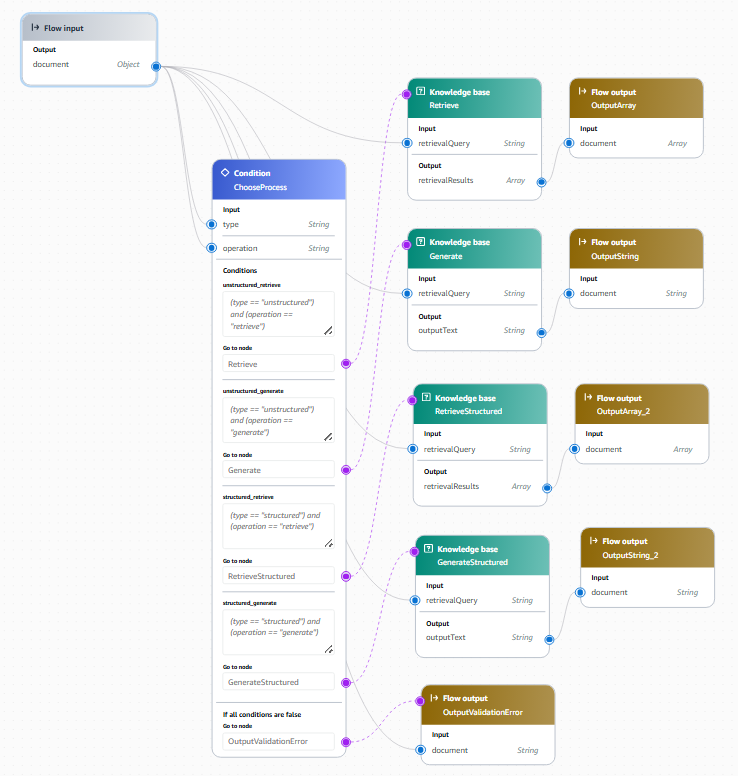

#### Flow identification

In this part, we identify the specific flow that will be used for the Rag Flow operations, establishing the necessary flow ID and alias for subsequent invocations.


In [7]:
flow_id = 'R9G20F24D4'
flow_alias_id = 'FFTVRHL37D'

### 2.1 Search unstructured data store (S3 File Storage)

This subsection demonstrates how to search through an unstructured data store, showcasing the process of querying data and retrieving relevant results based on the specified parameters.


In [8]:
query = """
What are the three most central entities of the system database?
Decide this based on the relashioonships between entities.
Central in this case means to be higher up in the entity hierarchy.
"""

params = {
    "type": "unstructured", # structured / unstructured
    "operation": "retrieve", # retrieve / generate
    "query": query,
    "validation_error_message": "Input invalid. Try again."
}

result = invoke_flow(
    client_runtime,
    flow_id,
    flow_alias_id,
    params
)

Flow invocation was successful! The output of the flow is as follows:

[{'score': 0.43275762, 'location': {'sharePointLocation': None, 'salesforceLocation': None, 'sqlLocation': None, 'kendraDocumentLocation': None, 'confluenceLocation': None, 'customDocumentLocation': None, 's3Location': {'uri': 's3://aas-fg-db-model/tables_relations.json'}, 'type': 'S3', 'webLocation': None}, 'metadata': {'x-amz-bedrock-kb-source-uri': {'number': False, 'boolean': False, 'string': True, 'null': False, 'list': False, 'map': False}, 'x-amz-bedrock-kb-chunk-id': {'number': False, 'boolean': False, 'string': True, 'null': False, 'list': False, 'map': False}, 'x-amz-bedrock-kb-data-source-id': {'number': False, 'boolean': False, 'string': True, 'null': False, 'list': False, 'map': False}}, 'content': {'byteContent': None, 'row': None, 'text': ',\r {\r \t"Table Name": "document_entity",\r \t"Foreign Key": "created_by_user_id",\r \t"Related Table": "user",\r \t"Relationship Type": "many-to-one" },\r {\r \t"

### 2.2 Generate for unstructured data store (S3 File Storage)

This subsection illustrates how to generate insights or information from an unstructured data store. It describes the process of querying the data and retrieving central entities based on their relationships within the database.


In [9]:
query = """
What are the three most central entities of the system database?
Decide this based on the relashioonships between entities.
Central in this case means to be higher up in the entity hierarchy.
"""

params = {
    "type": "unstructured", # structured / unstructured
    "operation": "generate", # retrieve / generate
    "query": query,
    "validation_error_message": "Input invalid. Try again."
}

result = invoke_flow(
    client_runtime,
    flow_id,
    flow_alias_id,
    params
)

Flow invocation was successful! The output of the flow is as follows:

Based on the search results, the three most central entities in the system database appear to be:

1. project
2. user
3. company

These entities are central because they have many-to-one relationships with other entities in the database, indicating they are higher up in the entity hierarchy. Specifically:

- The project entity has a many-to-one relationship with the entity_statistics table (source 1).
- The user entity has a many-to-one relationship with the document_entity and eq_parameter tables (sources 2, 3, 4).
- The company entity has a many-to-one relationship with the eq_category table (source 2).


### 2.3 Search for structured data store (Redshift SQL Database)

In this part, we focus on searching through a structured data store. The section demonstrates how to execute SQL queries to retrieve specific data from tables, showcasing the integration of structured data retrieval within the Rag Flow framework.


In [10]:
query = "Test table values."

params = {
    "type": "structured",
    "operation": "retrieve",
    "query": query,
    "validation_error_message": "Input invalid. Try again."
}

result = invoke_flow(
    client_runtime,
    flow_id,
    flow_alias_id,
    params
)

Flow invocation was successful! The output of the flow is as follows:

[{'score': None, 'location': {'sharePointLocation': None, 'salesforceLocation': None, 'sqlLocation': {'query': 'SELECT * FROM public."table-test";'}, 'kendraDocumentLocation': None, 'confluenceLocation': None, 'customDocumentLocation': None, 's3Location': None, 'type': 'SQL', 'webLocation': None}, 'metadata': None, 'content': {'byteContent': None, 'row': [{'columnValue': '1', 'type': 'LONG', 'columnName': 'col1'}, {'columnValue': '2', 'type': 'LONG', 'columnName': 'col2'}, {'columnValue': 'a', 'type': 'STRING', 'columnName': 'col3'}], 'text': None, 'type': 'ROW'}}, {'score': None, 'location': {'sharePointLocation': None, 'salesforceLocation': None, 'sqlLocation': {'query': 'SELECT * FROM public."table-test";'}, 'kendraDocumentLocation': None, 'confluenceLocation': None, 'customDocumentLocation': None, 's3Location': None, 'type': 'SQL', 'webLocation': None}, 'metadata': None, 'content': {'byteContent': None, 'row': [

### 2.4 Generate for structured data store (Redshift SQL Database)

This subsection demonstrates how to generate insights or information from a structured data store. It outlines the process of querying a specific table and retrieving data, showcasing how structured data can be effectively utilized within the Rag Flow framework.


In [11]:
query = "Test table values."

params = {
    "type": "structured",
    "operation": "generate",
    "query": query,
    "validation_error_message": "Input invalid. Try again."
}

result = invoke_flow(
    client_runtime,
    flow_id,
    flow_alias_id,
    params
)

Flow invocation was successful! The output of the flow is as follows:

The query returned 2 rows from the "table-test" table. The table has 3 columns: col1, col2, and col3. The first row shows the values 1, 2, and 'a', and the second row shows the values 3, 4, and 'b'.
